

# Project: Hospital Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Questions that can be posed for Analysis are::
1)Does the show of patient depends on the sms received factor?
2)Is show depending on the gender specific?
3)How is Neighbourhood playing any role for show of patients?
4)Does the diabetic or hipertension or alcoholic patients have more chances to appear for apoointments booked?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df.drop('AppointmentID',axis=1,inplace=True)

In [3]:
df.drop('PatientId',axis=1,inplace=True)



### Data Cleaning (Correcting Bad data and renaming of column)
<a wrangling> </a>

In [4]:

# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.head(1)
#sinca we are not having any null values issue we will simply draw bar charts and 
#   check the following questionson next part

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [5]:
#check for duplicates
#df.duplicated().argmax()
df[df.duplicated(keep=False)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
153,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
154,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
368,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
369,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
370,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
371,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
465,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÇÃO,0,0,0,0,0,0,No
466,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÇÃO,0,0,0,0,0,0,No
553,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes
554,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes


In [6]:
df.drop_duplicates(keep=False,inplace=True)
#RENAME COLUMNS
df.rename(columns={'No-show': 'no_show'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109296 entries, 0 to 110526
Data columns (total 12 columns):
Gender            109296 non-null object
ScheduledDay      109296 non-null object
AppointmentDay    109296 non-null object
Age               109296 non-null int64
Neighbourhood     109296 non-null object
Scholarship       109296 non-null int64
Hipertension      109296 non-null int64
Diabetes          109296 non-null int64
Alcoholism        109296 non-null int64
Handcap           109296 non-null int64
SMS_received      109296 non-null int64
no_show           109296 non-null object
dtypes: int64(7), object(5)
memory usage: 10.8+ MB


In [8]:
#again recheck for duplicate
df.duplicated().sum()

0

In [9]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,109296.000000,109296.000000,109296.000000,109296.000000,109296.000000,109296.000000,109296.000000
mean,37.094734,0.098293,0.197290,0.071778,0.030468,0.022041,0.324641
std,23.131976,0.297711,0.397955,0.258120,0.171871,0.160455,0.468243
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd81b1e6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcd8192ab38>]], dtype=object)

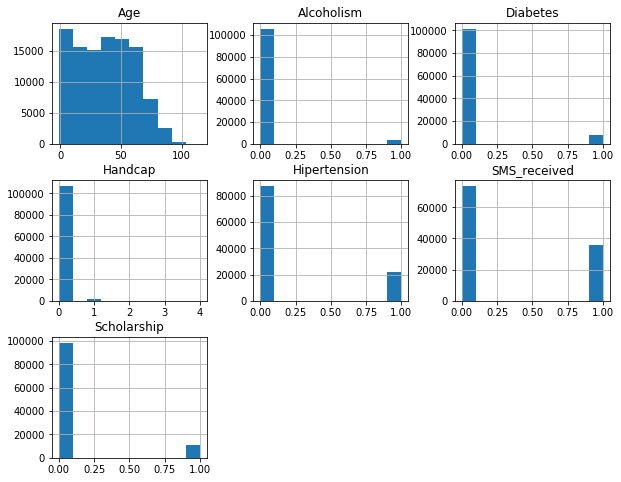

In [11]:
df.hist(figsize=(10,8))

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Does the show of patient depends on the sms received factor!)

In [12]:
show=df.no_show=='No'
no_show=df.no_show=='Yes'


In [13]:
df.SMS_received[show].mean()

0.29401400393574667

In [14]:
df.SMS_received[no_show].mean()

0.44692124977160608

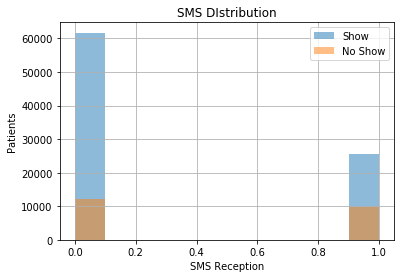

In [15]:
df.SMS_received[show].hist(alpha=0.5,label='Show')
df.SMS_received[no_show].hist(alpha=0.5,label='No Show')
plt.title('SMS DIstribution')
plt.xlabel('SMS Reception')
plt.ylabel('Patients')
plt.legend()

This shows that the number of Show is more even when the patients didn't received the sms. Hence lets checkout other factors for theiw showup.

### Research Question 2  (What factors will play the important role for showup of patient!)

In [16]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


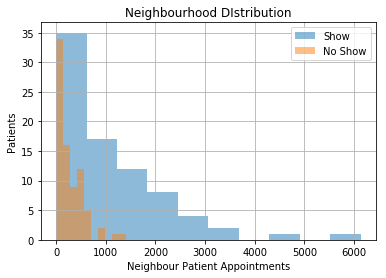

In [17]:
#neighbourhood factor
df.Neighbourhood[show].value_counts().hist(alpha=0.5,label='Show')
df.Neighbourhood[no_show].value_counts().hist(alpha=0.5,label='No Show')
plt.title('Neighbourhood DIstribution')
plt.xlabel('Neighbour Patient Appointments')
plt.ylabel('Patients')
plt.legend()
plt.legend()

The Neighbourhood which has maximum show has the maximum no shows too so clearly can't say how the show or noshow is depending on the neighbourhood.

In [18]:
df.groupby('Gender').mean()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Gender,,,,,,,
F,38.897305,0.123349,0.213795,0.078126,0.017064,0.019387,0.340748
M,33.749308,0.051790,0.166658,0.059995,0.055344,0.026966,0.294748


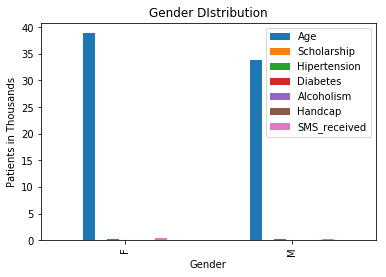

In [19]:
#Gender Factor
df.groupby('Gender').mean().plot(kind='bar')
plt.title('Gender DIstribution')
plt.xlabel('Gender')
plt.ylabel('Patients in Thousands')
plt.legend()


Females book more appointments and there turnout possibility is more than males.

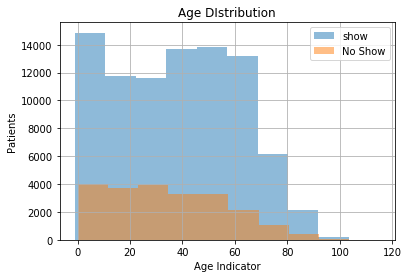

In [20]:
#age factor for showup 
df.Age[show].hist(alpha=0.5,label='show')
df.Age[no_show].hist(alpha=0.5,label='No Show')
plt.title('Age DIstribution')
plt.xlabel('Age Indicator')
plt.ylabel('Patients')
plt.legend()
plt.legend()

More age people books less apoointments.Agegroup after 65 years tend to book less appointment and their no show is also proportionate. young age people have almost same no show values.   

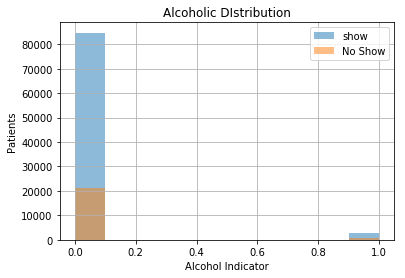

In [21]:
df.Alcoholism[show].hist(alpha=0.5,label='show')
df.Alcoholism[no_show].hist(alpha=0.5,label='No Show')
plt.title('Alcoholic DIstribution')
plt.xlabel('Alcohol Indicator')
plt.ylabel('Patients')
plt.legend()

Non Alcoholic people tend to show more.  

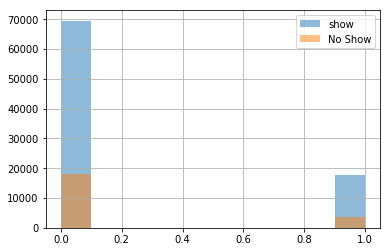

In [22]:
df.Hipertension[show].hist(alpha=0.5,label='show')
df.Hipertension[no_show].hist(alpha=0.5,label='No Show')
plt.legend()

People with no hipertension also show more but with hipretension the number of show is increasing too.

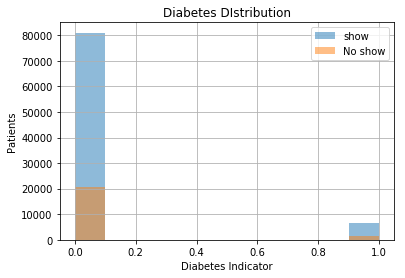

In [23]:
df.Diabetes[show].hist(alpha=0.5,label='show')
df.Diabetes[no_show].hist(alpha=0.5,label='No show')
plt.title('Diabetes DIstribution')
plt.xlabel('Diabetes Indicator')
plt.ylabel('Patients')
plt.legend()

Diabetic people don't turn out to be more interested in their checkups.

In [24]:
#lets check whether any particular day has most rush 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['day_of_week'] = df['AppointmentDay'].dt.weekday_name
df['day_of_week']

0            Friday
1            Friday
2            Friday
3            Friday
4            Friday
5            Friday
6            Friday
7            Friday
8            Friday
9            Friday
10           Friday
11           Friday
12           Friday
13           Friday
14           Friday
15           Friday
16           Friday
17           Friday
18           Friday
19           Friday
20           Friday
21           Friday
22           Friday
23           Friday
24           Friday
25           Friday
26           Friday
27           Friday
28           Friday
29           Friday
            ...    
110497    Wednesday
110498    Wednesday
110499    Wednesday
110500    Wednesday
110501    Wednesday
110502    Wednesday
110503    Wednesday
110504    Wednesday
110505    Wednesday
110506    Wednesday
110507    Wednesday
110508    Wednesday
110509    Wednesday
110510    Wednesday
110511    Wednesday
110512    Wednesday
110513    Wednesday
110514    Wednesday
110515    Wednesday


Text(0,0.5,'Patients')

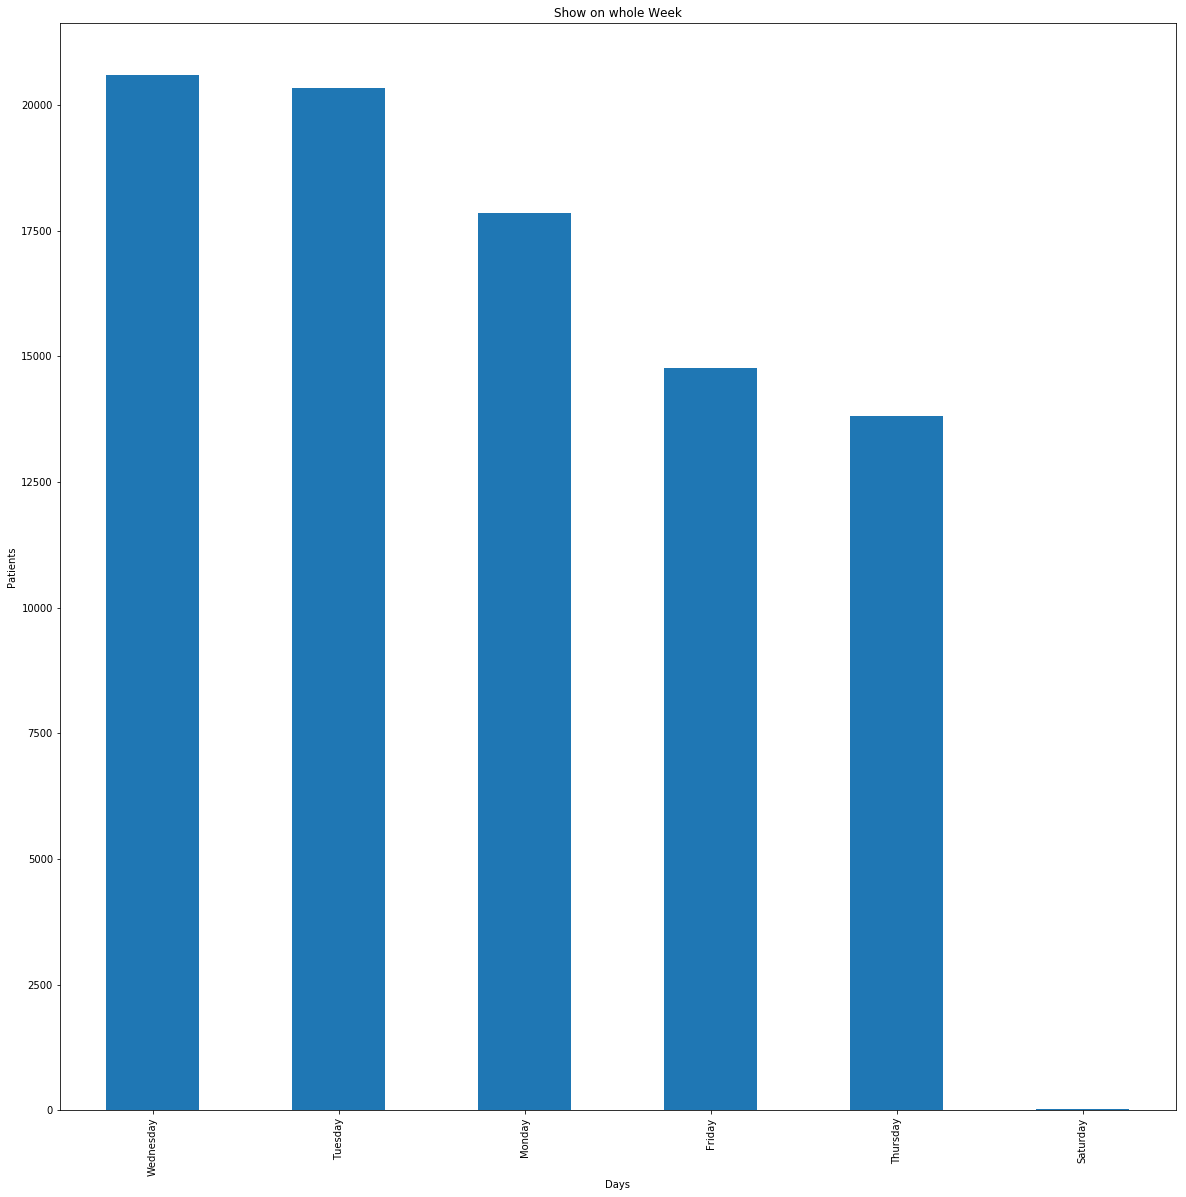

In [25]:
df.day_of_week[show].value_counts().plot(kind='bar',figsize=(20,20))
plt.title('Show on whole Week')
plt.xlabel('Days')
plt.ylabel('Patients')


Text(0,0.5,'Patients')

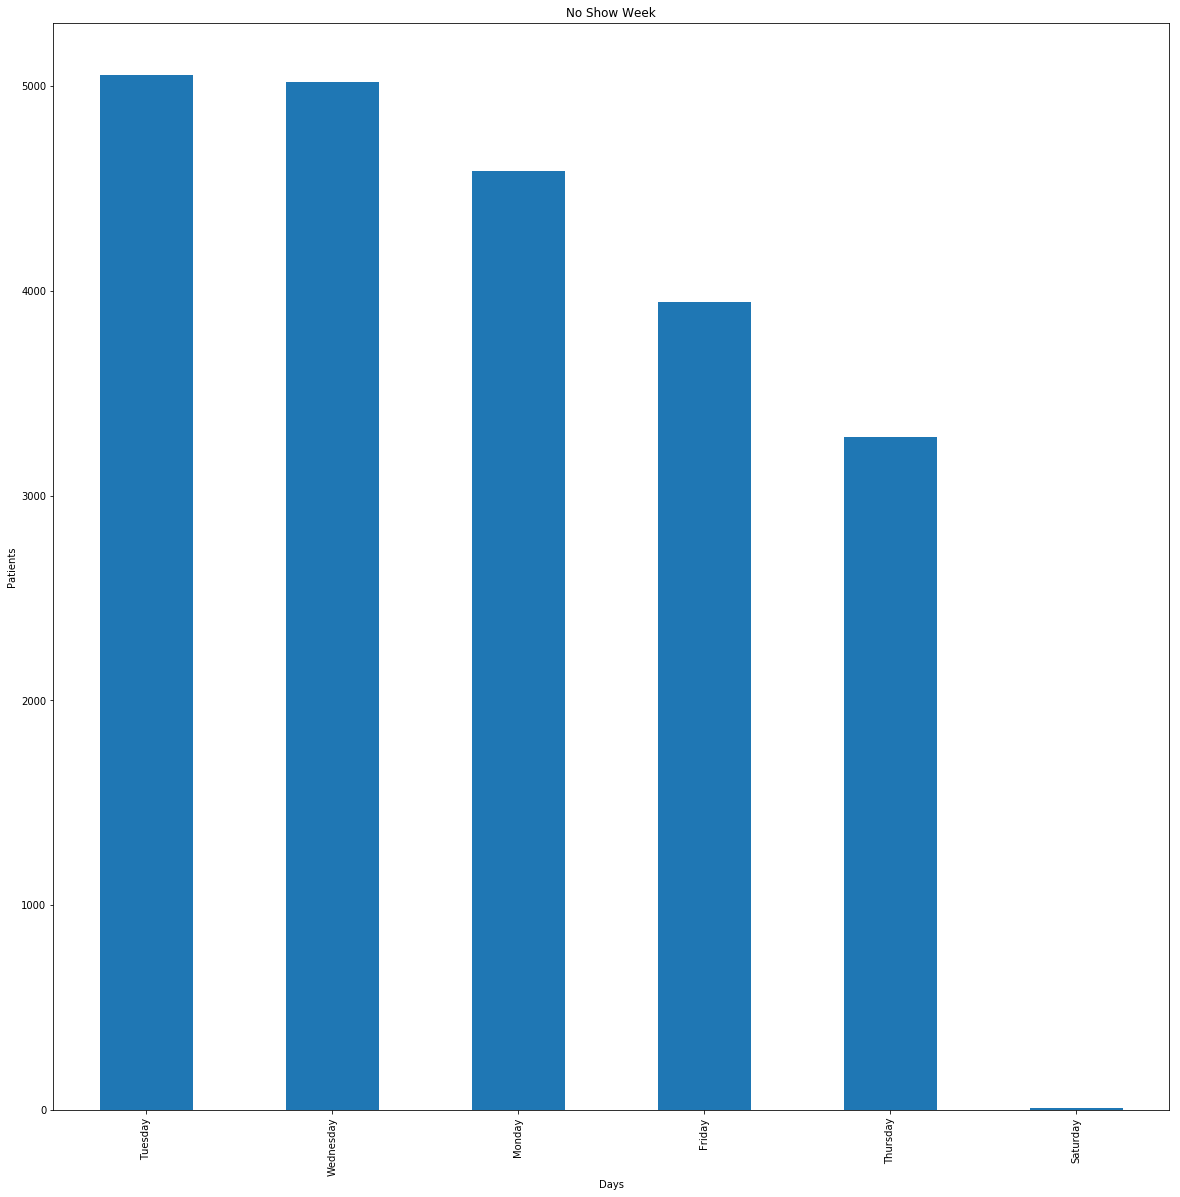

In [26]:
df.day_of_week[no_show].value_counts().plot(kind='bar',figsize=(20,20))
plt.title('No Show Week')
plt.xlabel('Days')
plt.ylabel('Patients')


On checking the appointment day on a particular day i.e, Wednesday maximum number of people will show and on tuesdays maximum number of people will not show.

<a id='conclusions'></a>
## Conclusions

1)This shows that the number of Show is more even when the patients didn't received the sms. Hence lets checkout other factors for their show up.
2)Females book more appointments and there turnout possibility is more than males.
3)More age people books less appointments. Agegroup after 65 years tend to book less appointment and their no show is also proportionate. young age people have almost same no show values.
4)Non Alcoholic people tend to show more. 
5)People with no hipertension also show more but with hipretension the number of show is increasing too.
6)Diabetic people don't turn out to be more interested in their checkups.
7)On checking the appointment day on a particular day i.e, Wednesday maximum number of people   will show and on tuesdays maximum number of people will not show.

<a id='Limitations'></a>
## Limitations
Their are certain outliers in each and every column like hipertension,alcoholism,Sms_received,scholarship which doesnt clearly give a certain picture of dependency.

There are few duplicates which were removed from the data for clear analysis.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0